In [2]:
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [5]:
#loading the dataset
dems = pd.read_csv('../data/dem_with_dummies.csv',
                             index_col=[0,1,2])

In [6]:
dems

,,,Primary..,Neutral.Endorsements,Yes.Endorsements,No.Endorsements,Office.Type_Governor,Office.Type_Representative,Office.Type_Senator,Primary.Status_Advanced,Race_Nonwhite,Race_Unknown,...,LGBTQ._Yes,Elected.Official._Yes,Self.Funder._Yes,STEM._No,STEM._Unknown,STEM._Yes,Obama.Alum._Yes,Party.Support._Neutral,Party.Support._No,Party.Support._Yes
,Candidate,State,,,,,,,,,,,,,,,,,,,,,
0,Anthony White (Alabama),AL,3.420000,11,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,Christopher Countryman,AL,1.740000,11,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,"Doug ""New Blue"" Smith",AL,3.270000,11,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,James C. Fields,AL,8.000000,11,0,1,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,Sue Bell Cobb,AL,28.980000,11,0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5,Walt Maddox,AL,54.599998,11,1,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
6,Lizzetta Hill McConnell,AL,19.230000,12,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7,Robert Kennedy Jr.,AL,80.769997,12,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
8,Audri Scott Williams,AL,39.560001,12,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [7]:
# Split data into training and testing data
dems_subtrain = dems.head(600)
dems_subtest = dems.tail(dems.shape[0] - 600)

In [8]:
# Split training data further into training and testing data
dems_train_features, dems_test_features, dems_train_outcome, dems_test_outcome = train_test_split(
    dems_subtrain.drop("Primary.Status_Advanced", axis=1),
    dems_subtrain['Primary.Status_Advanced'],
    test_size=0.30, 
    random_state=11
)

In [9]:
# Used recursive feature elimination to determine variables
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(dems_train_features, dems_train_outcome)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [False False  True  True  True False False False False False False False
 False False False  True  True  True  True False  True False False  True
  True]
Feature Ranking: [ 9  5  1  1  1 15  2 14  7  3  6 12  8  4 11  1  1  1  1 13  1 10 16  1
  1]


In [10]:
# The best features
dems_features = ['Yes.Endorsements','No.Endorsements', 'Office.Type_Governor', 'STEM._Yes','STEM._No','LGBTQ._Yes','Party.Support._No', 'Party.Support._Yes','Self.Funder._Yes','Elected.Official._Yes']

In [11]:
dems_train_features = dems_train_features[dems_features]
dems_test_features = dems_test_features[dems_features]

## RFC

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

In [13]:
clf.fit(dems_train_features, dems_train_outcome)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
train_pred = clf.predict(dems_test_features)

In [15]:
print(accuracy_score(dems_test_outcome,train_pred))

0.7333333333333333


## cross validation

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
clf=RandomForestClassifier(n_estimators=100)
folds = KFold(n_splits = 10, shuffle=True)
np.mean(cross_val_score(clf, dems_train_features, dems_train_outcome, cv = folds))

0.7476190476190475

In [17]:
# Dictionary to hold accuracies
accuracies = {}

# Object indicating how to fold the data
folds = KFold(n_splits=10, shuffle=True, random_state=11)

# Iterate through values of k, get the mean score across folds
for k in range(1, 100):
   score = np.mean(cross_val_score(RandomForestClassifier(n_estimators=k),
               dems_train_features, dems_train_outcome, cv=folds))
   accuracies[k] = score

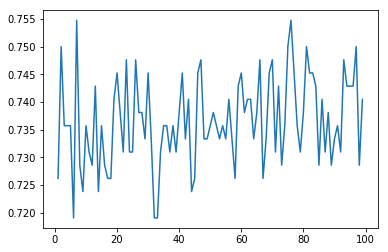

In [18]:
plt.plot(accuracies.keys(), accuracies.values())

## Grid Search

In [19]:
rfc=RandomForestClassifier(random_state=100)
param_grid = { 
    'n_estimators': [5, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [20]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(dems_train_features, dems_train_outcome)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
# Get the best parameters for the model
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [24]:
# Tuned model
rfc_tuned=RandomForestClassifier(random_state=100, max_features='auto', n_estimators= 500, max_depth=5, criterion='gini')

In [25]:
rfc_tuned.fit(dems_train_features, dems_train_outcome)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [28]:
rfc_pred=rfc_tuned.predict(dems_test_features)
rfc_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [29]:
dems_rfc_tuned = accuracy_score(dems_test_outcome, rfc_pred)
print(dems_rfc_tuned)

0.7555555555555555


## KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [31]:
from sklearn.pipeline import make_pipeline
knn_pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
folds = KFold(n_splits=10, shuffle=True, random_state=11)
knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1, 50),"kneighborsclassifier__weights":["uniform", "distance"]}
knn_grid_search = GridSearchCV(knn_pipe, knn_param_grid, cv=folds)

In [32]:
knn_grid_search.fit(dems_train_features, dems_train_outcome)

GridSearchCV(cv=KFold(n_splits=10, random_state=11, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kneighborsclassifier__n_neighbors': range(1, 50), 'kneighborsclassifier__weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
# Best parameters for the knn model
knn_grid_search.best_params_

{'kneighborsclassifier__n_neighbors': 24,
 'kneighborsclassifier__weights': 'uniform'}

In [34]:
knn_tuned = KNeighborsClassifier(n_neighbors=24, weights='uniform')
knn_tuned.fit(dems_train_features, dems_train_outcome)

knn_pred = knn_tuned.predict(dems_test_features)
dems_knn_tuned = accuracy_score(dems_test_outcome, knn_pred)
print(dems_knn_tuned)

0.6777777777777778


In [38]:
def add_a_row(data,dest):
    '''
    Takes in row 'data' and destination 'dest' dataframe
    to add row to
    '''
    dest.loc[dest.size + 1] = data
    
#def model_fit(grid, feat, out):
#    return grid.

accuracy = pd.DataFrame(columns=['Model Type', 'Score'])

# rows to add
add_a_row(['KNN', dems_rfc_tuned], accuracy)
add_a_row(['RFR', dems_knn_tuned], accuracy)

print(accuracy)
accuracy.to_csv('../data/model_accuracy_ML.csv')


  Model Type     Score
1        KNN  0.755556
3        RFR  0.677778


In [51]:
outcome_vs_pred = pd.DataFrame(columns=["outcome", "knn_pred", "rfc_pred"])

outcome_vs_pred['outcome'] = dems_test_outcome
outcome_vs_pred['knn_pred'] = knn_pred
outcome_vs_pred['rfc_pred'] = rfc_pred

outcome_vs_pred

outcome_vs_pred.to_csv('../data/model_test_predictions.csv')